<a href="https://colab.research.google.com/github/tatianaesc/estatisticadatascience/blob/master/EstatisticaParaDataScience_Cap8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 8 - Experimentação Contínua

In [1]:
# Habilita a execução de R no Google Colab
%load_ext rpy2.ipython

## Teste de Kolmogorov-Smirnov (K-S)

In [2]:
from scipy import stats
import numpy as np

# Amostra de dados que queremos testar

amostra = [0.74251415, 0.62420845, 0.84410007, 0.75873994, 0.85271946, 0.90323381,
 0.94143253, 0.89953117, 0.60409993, 0.72599232, 0.85549676, 0.66007039,
 0.78236281, 0.61901836, 0.66999878, 0.60648263, 0.87779426, 0.67837364,
 0.72087309, 0.92482845, 0.84654504, 0.61114363, 0.65764295, 0.81751744,
 0.80203001, 0.68326249, 0.92697497, 0.81488808, 0.78747148, 0.80646849]

# Executar o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(amostra)

# Exibir os resultados
print("\nEstatística de teste:", stat)
print("p-valor:", p_valor)

# Interpretar os resultados
alpha = 0.05
if p_valor > alpha:
    print("Não há evidências suficientes para rejeitar a hipótese nula (a amostra parece ser normal)")
else:
    print("A hipótese nula é rejeitada (a amostra não parece ser normal)")


Estatística de teste: 0.9402154684066772
p-valor: 0.09218211472034454
Não há evidências suficientes para rejeitar a hipótese nula (a amostra parece ser normal)


## Teste de Shapiro-Wilk

In [3]:
import numpy as np
from scipy import stats

# Amostra de dados (substitua com seus próprios dados)
dados_amostra = np.array([23.4, 24.1, 22.8, 24.5, 23.9, 24.2, 23.7, 22.5, 23.0, 24.8])

# Executando o teste de Shapiro-Wilk
stat, p_valor = stats.shapiro(dados_amostra)

# Exibindo os resultados do teste
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor > alpha:
    print("Os dados parecem seguir uma distribuição normal (não rejeita H0)")
else:
    print("Os dados não parecem seguir uma distribuição normal (rejeita H0)")

Estatística de teste: 0.9695503115653992
p-valor: 0.8866446614265442
Os dados parecem seguir uma distribuição normal (não rejeita H0)


## Teste de Levene

In [4]:
import numpy as np
from scipy import stats

# Crie três grupos de dados (amostras)
grupo1 = np.array([25, 30, 35, 40, 45])
grupo2 = np.array([20, 28, 36, 44, 52])
grupo3 = np.array([22, 29, 36, 43, 50])

# Execute o Teste de Levene
stat, p_valor = stats.levene(grupo1, grupo2, grupo3)

# Exibindo os resultados do teste
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor > alpha:
    print("Não há evidência suficiente para rejeitar a hipótese nula (variâncias são homogêneas)")
else:
    print("Evidências sugerem que as variâncias não são homogêneas entre os grupos")

Estatística de teste: 0.5217391304347827
p-valor: 0.6063550013439997
Não há evidência suficiente para rejeitar a hipótese nula (variâncias são homogêneas)


## Teste t de Student (ou Student-t)

In [5]:
import numpy as np
from scipy import stats

# Amostras independentes
amostra1 = np.array([67, 71, 64, 73, 69])
amostra2 = np.array([58, 62, 60, 65, 63])

# Realize o teste t de Student
stat, p_valor = stats.ttest_ind(amostra1, amostra2)

# Exibindo os resultados do teste
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor < alpha:
    print("Rejeita a hipótese nula: As médias são estatisticamente diferentes")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula: As médias são estatisticamente iguais")

Estatística de teste: 3.6458617215011975
p-valor: 0.006533336186679828
Rejeita a hipótese nula: As médias são estatisticamente diferentes


## Teste de Análise de Variância (ANOVA)

In [6]:
import numpy as np
from scipy import stats

# Três grupos de amostras
grupo1 = np.array([28, 32, 35, 37, 30])
grupo2 = np.array([25, 29, 31, 34, 27])
grupo3 = np.array([23, 26, 28, 30, 22])

# Execute o teste ANOVA
stat, p_valor = stats.f_oneway(grupo1, grupo2, grupo3)

# Exibindo os resultados do teste
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor < alpha:
    print("Rejeita a hipótese nula: Há diferenças significativas entre as médias dos grupos")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula: As médias dos grupos são estatisticamente iguais")

Estatística de teste: 4.45231607629428
p-valor: 0.03577933766742762
Rejeita a hipótese nula: Há diferenças significativas entre as médias dos grupos


## Teste de Tukey

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Grupo1 Grupo2     -3.6 0.2763  -9.0884  1.8884  False
Grupo1 Grupo3      4.2 0.1684  -1.2884  9.6884  False
Grupo1 Grupo4     -5.6 0.0447 -11.0884 -0.1116   True
Grupo2 Grupo3      7.8 0.0045   2.3116 13.2884   True
Grupo2 Grupo4     -2.0 0.7277  -7.4884  3.4884  False
Grupo3 Grupo4     -9.8 0.0005 -15.2884 -4.3116   True
-----------------------------------------------------


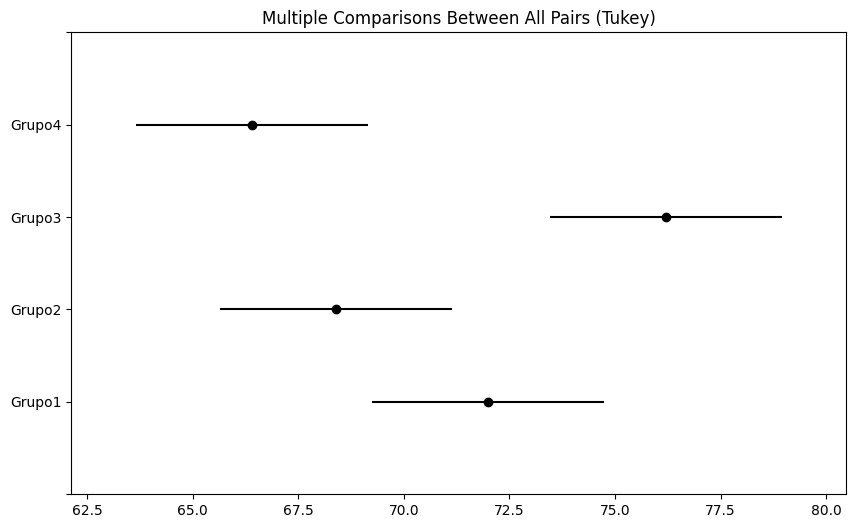

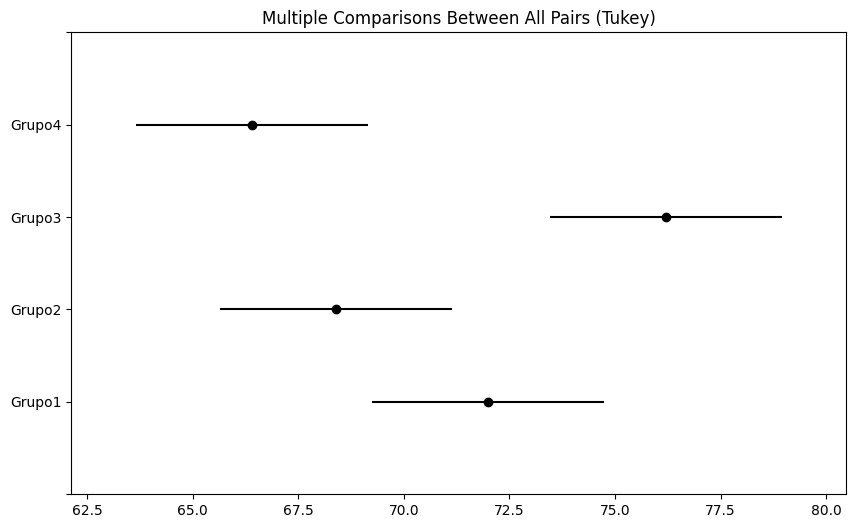

In [7]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Quatro grupos de amostras
grupo1 = np.array([68, 72, 76, 74, 70])
grupo2 = np.array([65, 68, 70, 73, 66])
grupo3 = np.array([72, 78, 80, 76, 75])
grupo4 = np.array([63, 66, 68, 65, 70])

# Combine os dados em um único DataFrame
dados = pd.DataFrame({'Amostra': ['Grupo1'] * len(grupo1) + ['Grupo2'] * len(grupo2) + ['Grupo3'] * len(grupo3) + ['Grupo4'] * len(grupo4),
                      'Valores': np.concatenate([grupo1, grupo2, grupo3, grupo4])})

# Realize o teste de Tukey
resultado_tukey = pairwise_tukeyhsd(dados['Valores'], dados['Amostra'], alpha=0.05)

# Exibindo os resultados do teste
print(resultado_tukey)

# Visualize os resultados em um gráfico
resultado_tukey.plot_simultaneous()

## Teste de Mann-Whitney

In [8]:
import numpy as np
from scipy import stats

# Amostras independentes
amostra1 = np.array([15, 18, 22, 24, 28, 32, 35, 40])
amostra2 = np.array([10, 14, 20, 25, 30, 34, 38, 42])

# Execute o teste de Mann-Whitney
stat, p_valor = stats.mannwhitneyu(amostra1, amostra2)

# Exibindo os resultados do teste
print("Estatística de teste U:", stat)
print("Valor-p:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor < alpha:
    print("Rejeita a hipótese nula: As distribuições das amostras são estatisticamente diferentes")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula: As distribuições das amostras são estatisticamente iguais")

Estatística de teste U: 32.0
Valor-p: 1.0
Não há evidência suficiente para rejeitar a hipótese nula: As distribuições das amostras são estatisticamente iguais


## Teste de Kruskal-Wallis

In [9]:
import numpy as np
from scipy import stats

# Três grupos de amostras
grupo1 = np.array([28, 32, 35, 30, 34])
grupo2 = np.array([25, 29, 30, 27, 31])
grupo3 = np.array([20, 23, 22, 26, 24])

# Execute o teste de Kruskal-Wallis
stat, p_valor = stats.kruskal(grupo1, grupo2, grupo3)

# Exibindo os resultados do teste
print("Estatística de teste de Kruskal-Wallis:", stat)
print("p-valor:", p_valor)

# Interpretando o resultado
alpha = 0.05  # Nível de significância escolhido
if p_valor < alpha:
    print("Rejeita a hipótese nula: Pelo menos um grupo tem uma mediana diferente dos outros")
else:
    print("Não há evidência suficiente para rejeitar a hipótese nula: As medianas dos grupos são iguais")

Estatística de teste de Kruskal-Wallis: 10.103041144901617
p-valor: 0.006399594996275725
Rejeita a hipótese nula: Pelo menos um grupo tem uma mediana diferente dos outros


## Effect Size

In [10]:
import numpy as np
from scipy import stats

# Dados de exemplo: pontuações de precisão dos modelos A e B
modelo_A = np.array([0.78, 0.82, 0.85, 0.79, 0.81])
modelo_B = np.array([0.88, 0.92, 0.90, 0.89, 0.91])

# Calculando as médias e os desvios padrão das pontuações
media_A = np.mean(modelo_A)
media_B = np.mean(modelo_B)
desvio_padrao_A = np.std(modelo_A, ddof=1)  # Usando ddof=1 para calcular o desvio padrão amostral
desvio_padrao_B = np.std(modelo_B, ddof=1)

# Calculando a diferença nas médias
diferenca_medias = media_B - media_A

# Calculando o Effect Size usando Cohen's d
effect_size = diferenca_medias / np.sqrt((desvio_padrao_A ** 2 + desvio_padrao_B ** 2) / 2)

# Realizando um teste de hipótese para determinar a significância estatística
t_stat, p_valor = stats.ttest_ind(modelo_A, modelo_B)

# Imprimindo os resultados
print(f'Média do Modelo A: {media_A:.2f}')
print(f'Média do Modelo B: {media_B:.2f}')
print(f'Diferença nas Médias: {diferenca_medias:.2f}')
print(f'Effect Size (Cohen\'s d): {effect_size:.2f}')
print(f'Valor p do Teste de Hipótese: {p_valor:.4f}')

# Interpretando o resultado
if p_valor < 0.05:
    print('A diferença nas médias é estatisticamente significativa.')
else:
    print('A diferença nas médias não é estatisticamente significativa.')


Média do Modelo A: 0.81
Média do Modelo B: 0.90
Diferença nas Médias: 0.09
Effect Size (Cohen's d): 4.02
Valor p do Teste de Hipótese: 0.0002
A diferença nas médias é estatisticamente significativa.
